<a href="https://colab.research.google.com/github/aysenuressiz/aysenuressiz/blob/main/bitirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drive'a Baƒülanma

In [ ]:
# Google Drive'a baƒülanƒ±r.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#dosya yoluna gider
import os

COLAB_PATH = "/content/gdrive/MyDrive"
os.chdir(COLAB_PATH)

# Dataset Ayƒ±klama ve Sƒ±nƒ±flardaki sayƒ±larƒ± kontrol etme

In [ ]:
# Dataset klas√∂r√º kontrol edilir.
!ls data/

dataset2.zip		OriginalDataset      SameAugmented20SplitDataset
Original20SplitDataset	OriginalDataset.zip  SameAugmented30SplitDataset


In [ ]:
# Dataset ayƒ±klanƒ±r.
!unzip data/OriginalDataset.zip -d ./data

G√∂r√ºnt√ºlenen √ßƒ±kƒ±≈ü son 5000 satƒ±ra kƒ±saltƒ±ldƒ±.
  inflating: ./data/OriginalDataset/NonDemented/31 (100).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (11).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (12).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (13).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (14).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (15).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (16).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (17).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (18).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (19).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (2).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (20).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (21).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (22).jpg  
  inflating: ./data/OriginalDataset/NonDemented/31 (23).jpg  
  inflating:

In [ ]:
#Klas√∂rlerdeki g√∂r√ºnt√ºlerin sayƒ±sƒ±
import os

extract_path = "data/Original30SplitDataset/Train"  # Klas√∂r yolunu kontrol et

# Desteklenen g√∂r√ºnt√º formatlarƒ±
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
folder_image_counts = {}

# Klas√∂r√ºn var olup olmadƒ±ƒüƒ±nƒ± kontrol et
if os.path.exists(extract_path):
    # Her klas√∂rde ka√ß g√∂r√ºnt√º var say
    for folder_name in os.listdir(extract_path):
        folder_path = os.path.join(extract_path, folder_name)
        if os.path.isdir(folder_path):  # Sadece klas√∂rleri kontrol et
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    # Sonu√ßlarƒ± yazdƒ±r
    for folder, count in folder_image_counts.items():
        print(f"{folder}: {count} g√∂r√ºnt√º")
else:
    print("HATA: Belirtilen klas√∂r bulunamadƒ±! L√ºtfen yolu kontrol et.")


ModerateDemented: 44 g√∂r√ºnt√º
NonDemented: 2240 g√∂r√ºnt√º
VeryMildDemented: 1568 g√∂r√ºnt√º
MildDemented: 627 g√∂r√ºnt√º


#orjinal dataseti eƒüitim ve test olarak ayƒ±rma

In [ ]:
#K√ºt√ºphaneler
import os
import shutil
from sklearn.model_selection import train_test_split

%20 Test %80 Eƒüitim

In [ ]:
# Orijinal veri setinin bulunduƒüu klas√∂r
dataset_path = "data/OriginalDataset"
split_dataset_path = "data/Original20SplitDataset"  # Yeni klas√∂r yapƒ±sƒ±
train_path = os.path.join(split_dataset_path, "Train")  # Eƒüitim verisi klas√∂r√º
test_path = os.path.join(split_dataset_path, "Test")    # Test verisi klas√∂r√º

# Klas√∂rleri olu≈ütur
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Sƒ±nƒ±flar (class folders)
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

In [ ]:
# Eƒüitim ve test verilerini ayƒ±r
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # T√ºm resimlerin yolu - diƒüer olasƒ± resim uzantƒ±larƒ±nƒ± da ekle
    all_images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tiff', '.gif'))]

    # B√∂lmeden √∂nce all_images'ƒ±n bo≈ü olup olmadƒ±ƒüƒ±nƒ± kontrol et
    if not all_images:
        print(f"Uyarƒ±: {class_path} i√ßinde resim bulunamadƒ±. Bu klas√∂r atlanƒ±yor.")
        continue  # Bir sonraki class_folder'a ge√ß

    # Eƒüitim ve test verilerini %80 ve %20 oranƒ±nda ayƒ±r
    train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Yeni klas√∂rler olu≈ütur (her sƒ±nƒ±f i√ßin eƒüitim ve test alt klas√∂rleri)
    class_train_path = os.path.join(train_path, class_folder)
    class_test_path = os.path.join(test_path, class_folder)

    os.makedirs(class_train_path, exist_ok=True)
    os.makedirs(class_test_path, exist_ok=True)

    # Eƒüitim verilerini kopyala
    for img_path in train_images:
        shutil.copy(img_path, class_train_path)

    # Test verilerini kopyala
    for img_path in test_images:
        shutil.copy(img_path, class_test_path)

print("Veri seti ba≈üarƒ±yla eƒüitim ve test olarak b√∂l√ºnd√º.")

Veri seti ba≈üarƒ±yla eƒüitim ve test olarak b√∂l√ºnd√º.


%30 Test %70 Eƒüitim

In [ ]:
# Orijinal veri setinin bulunduƒüu klas√∂r
dataset_path = "data/OriginalDataset"
split_dataset_path = "data/Original30SplitDataset"  # Yeni klas√∂r yapƒ±sƒ±
train_path = os.path.join(split_dataset_path, "Train")  # Eƒüitim verisi klas√∂r√º
test_path = os.path.join(split_dataset_path, "Test")    # Test verisi klas√∂r√º

# Klas√∂rleri olu≈ütur
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Sƒ±nƒ±flar (class folders)
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

In [ ]:
# Eƒüitim ve test verilerini ayƒ±r
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # T√ºm resimlerin yolu - diƒüer olasƒ± resim uzantƒ±larƒ±nƒ± da ekle
    all_images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tiff', '.gif'))]

    # B√∂lmeden √∂nce all_images'ƒ±n bo≈ü olup olmadƒ±ƒüƒ±nƒ± kontrol et
    if not all_images:
        print(f"Uyarƒ±: {class_path} i√ßinde resim bulunamadƒ±. Bu klas√∂r atlanƒ±yor.")
        continue  # Bir sonraki class_folder'a ge√ß

    # Eƒüitim ve test verilerini %70 ve %30 oranƒ±nda ayƒ±r
    train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)

    # Yeni klas√∂rler olu≈ütur (her sƒ±nƒ±f i√ßin eƒüitim ve test alt klas√∂rleri)
    class_train_path = os.path.join(train_path, class_folder)
    class_test_path = os.path.join(test_path, class_folder)

    os.makedirs(class_train_path, exist_ok=True)
    os.makedirs(class_test_path, exist_ok=True)

    # Eƒüitim verilerini kopyala
    for img_path in train_images:
        shutil.copy(img_path, class_train_path)

    # Test verilerini kopyala
    for img_path in test_images:
        shutil.copy(img_path, class_test_path)

print("Veri seti ba≈üarƒ±yla eƒüitim ve test olarak b√∂l√ºnd√º.")

Veri seti ba≈üarƒ±yla eƒüitim ve test olarak b√∂l√ºnd√º.


#Veri Artƒ±rma

## Orantƒ±sal veri artƒ±rma (%50)

In [ ]:
!pip install tensorflow

In [ ]:
#k√ºt√ºphaneleri tanƒ±mla
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tqdm import tqdm

In [ ]:
# Klas√∂r yollarƒ±
dataset_path = "data/Original20SplitDataset/Train"  # Orijinal train veri klas√∂r√º
testi_path = "data/Original20SplitDataset/Test"  # Orijinal test veri klas√∂r√º
augmented_path = "data/50Augmented20SplitDataset"  # Artƒ±rƒ±lmƒ±≈ü verinin kaydedileceƒüi ana klas√∂r
train_path = os.path.join(augmented_path, "Train")  # Artƒ±rƒ±lmƒ±≈ü train klas√∂r√º
test_path = os.path.join(augmented_path, "Test")  # Test verisi klas√∂r√º (sadece kopyalanacak)

# Klas√∂rleri olu≈ütur
os.makedirs(augmented_path, exist_ok=True)
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)


In [ ]:
# Veri artƒ±rma kurallarƒ±
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
# Test verisini `Test` klas√∂r√ºne kopyala
for class_folder in os.listdir(testi_path):
    class_path = os.path.join(testi_path, class_folder)

    if not os.path.isdir(class_path):
        continue

    # Test klas√∂r√ºne orijinal veriyi kopyala
    save_test_path = os.path.join(test_path, class_folder)
    os.makedirs(save_test_path, exist_ok=True)  # Test klas√∂r√ºn√º olu≈ütur

    for file in os.listdir(class_path):
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Sadece resim dosyalarƒ±nƒ± kopyala
            shutil.copy(os.path.join(class_path, file), os.path.join(save_test_path, file))

In [ ]:
# Eƒüitim klas√∂rlerinde her bir sƒ±nƒ±fƒ± (class_folder) i≈üleyelim
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    # Klas√∂r deƒüilse ge√ß
    if not os.path.isdir(class_path):
        continue

    # Artƒ±rƒ±lmƒ±≈ü verilerin kaydedileceƒüi klas√∂r
    save_path = os.path.join(train_path, class_folder)
    os.makedirs(save_path, exist_ok=True)  # Klas√∂r yoksa olu≈ütur

    # Orijinal verileri artƒ±rƒ±lmƒ±≈ü klas√∂re kopyala
    for file in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file), os.path.join(save_path, file))

    # G√∂rsellerin yolu
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # %50 oranƒ±nda artƒ±rma (√∂rneƒüin her sƒ±nƒ±ftaki mevcut g√∂r√ºnt√ºlerin yarƒ±sƒ± artƒ±rƒ±lacak)
    num_augmented = len(images) // 2
    print(f"{class_folder}: {len(images)} g√∂r√ºnt√º -> {num_augmented} yeni g√∂r√ºnt√º eklenecek")

    # Veri artƒ±rma i≈ülemi
    for img_path in tqdm(images[:num_augmented]):  # Sadece %50‚Äôlik kƒ±smƒ± artƒ±r
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # 4D array formatƒ±na getir

        # Artƒ±rƒ±lmƒ±≈ü g√∂r√ºnt√ºler olu≈ütur
        i = 0
        for batch in datagen.flow(img_array, batch_size=1):
            new_img = array_to_img(batch[0])
            new_img.save(os.path.join(save_path, f"aug_{i}_{os.path.basename(img_path)}"))
            i += 1
            if i >= 1:  # Her resim i√ßin 1 tane yeni olu≈ütur
                break

ModerateDemented: 51 g√∂r√ºnt√º -> 25 yeni g√∂r√ºnt√º eklenecek


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25/25 [00:00<00:00, 63.90it/s]


NonDemented: 2560 g√∂r√ºnt√º -> 1280 yeni g√∂r√ºnt√º eklenecek


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1280/1280 [00:19<00:00, 67.15it/s]


VeryMildDemented: 1792 g√∂r√ºnt√º -> 896 yeni g√∂r√ºnt√º eklenecek


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 896/896 [00:13<00:00, 65.57it/s]


MildDemented: 716 g√∂r√ºnt√º -> 358 yeni g√∂r√ºnt√º eklenecek


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 358/358 [00:05<00:00, 68.10it/s]


In [ ]:
#Klas√∂rlerdeki g√∂r√ºnt√ºlerin sayƒ±sƒ±
import os

extract_path = "data/SameAugmented30SplitDataset/Train"  # Klas√∂r yolunu kontrol et

# Desteklenen g√∂r√ºnt√º formatlarƒ±
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
folder_image_counts = {}

# Klas√∂r√ºn var olup olmadƒ±ƒüƒ±nƒ± kontrol et
if os.path.exists(extract_path):
    # Her klas√∂rde ka√ß g√∂r√ºnt√º var say
    for folder_name in os.listdir(extract_path):
        folder_path = os.path.join(extract_path, folder_name)
        if os.path.isdir(folder_path):  # Sadece klas√∂rleri kontrol et
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    # Sonu√ßlarƒ± yazdƒ±r
    for folder, count in folder_image_counts.items():
        print(f"{folder}: {count} g√∂r√ºnt√º")
else:
    print("HATA: Belirtilen klas√∂r bulunamadƒ±! L√ºtfen yolu kontrol et.")


MildDemented: 2931 g√∂r√ºnt√º
ModerateDemented: 3180 g√∂r√ºnt√º
NonDemented: 2240 g√∂r√ºnt√º
VeryMildDemented: 2528 g√∂r√ºnt√º


## Sƒ±nƒ±f sayƒ±larƒ±nƒ± e≈üitleyerek veri artƒ±rma





In [ ]:
pip install tensorflow pillow numpy


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.5/24.5 MB 72.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.5/5.5 MB 104.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.1/5.1 MB 95.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.6/6.6 MB 106.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import os
import shutil
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math


In [ ]:
# Giri≈ü klas√∂r√º
original_data_dir = 'data/OriginalDataset'
train_dir = 'data/SameAugmented30SplitDataset/Train'
test_dir = 'data/SameAugmented30SplitDataset/Test'

In [ ]:
# Her sƒ±nƒ±f i√ßin hedef toplam (train + test)
TARGET_TOTAL = 3200
TEST_RATIO = 0.3

In [ ]:
# Veri artƒ±rma i√ßin jenerat√∂r
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Klas√∂rleri temizle ve yeniden olu≈ütur
def prepare_dirs():
    for base in [train_dir, test_dir]:
        if os.path.exists(base):
            shutil.rmtree(base)
        os.makedirs(base)

        for class_name in os.listdir(original_data_dir):
            os.makedirs(os.path.join(base, class_name), exist_ok=True)

In [ ]:
# Veriyi %80 train, %20 test olarak ayƒ±r
def split_data():
    for class_name in os.listdir(original_data_dir):
        class_path = os.path.join(original_data_dir, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        total = len(images)
        test_count =math.ceil(total * TEST_RATIO)
        test_images = images[:test_count]
        train_images = images[test_count:]

        # Teste kopyala
        for img_name in test_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(test_dir, class_name, img_name)
            shutil.copy(src, dst)

        # Traine kopyala
        for img_name in train_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(train_dir, class_name, img_name)
            shutil.copy(src, dst)

In [ ]:
# Veri artƒ±rma
def augment_class(class_path, target_count):
    images = os.listdir(class_path)
    current_count = len(images)

    if current_count >= target_count:
        return

    needed = target_count - current_count
    print(f"{os.path.basename(class_path)} sƒ±nƒ±fƒ±nda {needed} veri artƒ±rƒ±lacak.")

    i = 0
    while i < needed:
        img_name = random.choice(images)
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224, 224))  # Boyutlar ihtiyaca g√∂re deƒüi≈ütirilebilir
        x = augmenter.random_transform(np.array(img))
        x = Image.fromarray(x.astype('uint8'))

        new_name = f"aug_{i}_{img_name}"
        x.save(os.path.join(class_path, new_name))
        i += 1

In [ ]:
# Ana akƒ±≈ü
def main():
    prepare_dirs()
    split_data()

    for class_name in os.listdir(train_dir):
        test_count = len(os.listdir(os.path.join(test_dir, class_name)))
        target_train = TARGET_TOTAL - test_count
        augment_class(os.path.join(train_dir, class_name), target_train)

if __name__ == "__main__":
    import numpy as np
    main()


MildDemented sƒ±nƒ±fƒ±nda 2304 veri artƒ±rƒ±lacak.
ModerateDemented sƒ±nƒ±fƒ±nda 3136 veri artƒ±rƒ±lacak.
VeryMildDemented sƒ±nƒ±fƒ±nda 960 veri artƒ±rƒ±lacak.


In [ ]:
#Klas√∂rlerdeki g√∂r√ºnt√ºlerin sayƒ±sƒ±
import os

extract_path = "data/SameAugmented30SplitDataset/Train"  # Klas√∂r yolunu kontrol et

# Desteklenen g√∂r√ºnt√º formatlarƒ±
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
folder_image_counts = {}

# Klas√∂r√ºn var olup olmadƒ±ƒüƒ±nƒ± kontrol et
if os.path.exists(extract_path):
    # Her klas√∂rde ka√ß g√∂r√ºnt√º var say
    for folder_name in os.listdir(extract_path):
        folder_path = os.path.join(extract_path, folder_name)
        if os.path.isdir(folder_path):  # Sadece klas√∂rleri kontrol et
            image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
            folder_image_counts[folder_name] = image_count

    # Sonu√ßlarƒ± yazdƒ±r
    for folder, count in folder_image_counts.items():
        print(f"{folder}: {count} g√∂r√ºnt√º")
else:
    print("HATA: Belirtilen klas√∂r bulunamadƒ±! L√ºtfen yolu kontrol et.")


MildDemented: 2931 g√∂r√ºnt√º
ModerateDemented: 3180 g√∂r√ºnt√º
NonDemented: 2240 g√∂r√ºnt√º
VeryMildDemented: 2528 g√∂r√ºnt√º


## Veri artƒ±rma sonucu sƒ±nƒ±f daƒüƒ±lƒ±mlarƒ±

###**%80 Train, %20 Test**
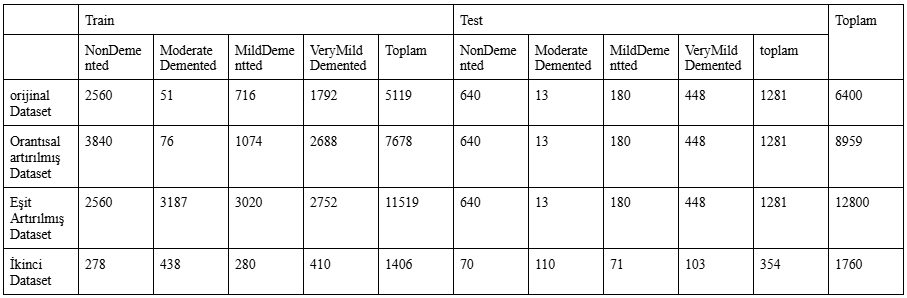

###**%70 Train, %30 Test**
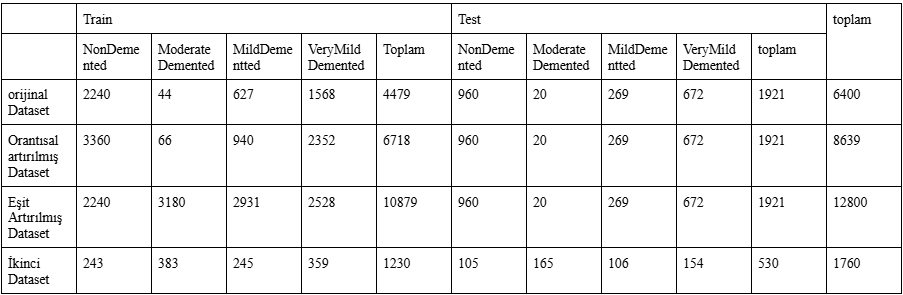

# Model Eƒüitimleri

## VGG-16

VGG-16 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarƒ±nƒ±n ba≈üarƒ±mlarƒ±

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad


In [ ]:
# Veri yolu ve g√∂rsel boyutu
dataset_path = r"data/dataset220SplitDataset"
img_size = 224

# Sƒ±nƒ±f etiketleri (Kategori -> Label ID)
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata olu≈ütu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eƒüitim ve test verisini y√ºkleme
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


In [ ]:
# VGG16 Modeli (Transfer √ñƒürenme)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model yapƒ±landƒ±rmasƒ±
def build_model(optimizer, dropout_rate=0.3):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Eƒüitim ve optimizasyon ayarlarƒ±
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}

# Model √∂zetini g√∂ster
base_model.summary()

# Sonu√ßlarƒ± saklamak i√ßin bo≈ü bir s√∂zl√ºk
results = {}

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\nüîÑ {optimizer_name} Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...\n")
    model = build_model(optimizer, dropout_rate=0.3)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    # Model tahminleri
    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    # Model deƒüerlendirme metrikleri
    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    # Sƒ±nƒ±f etiketlerini doƒürulama
    unique_labels = sorted(set(y_true))
    valid_label_names = [k for k, v in label_map.items() if v in unique_labels]

    # Classification Report
    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True, digits=4)

    # Sonu√ßlarƒ± kaydetme
    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    # Sonu√ßlarƒ± ekrana yazdƒ±rma
    print(f"‚úÖ Test Accuracy: {test_acc:.4f}")
    print(f"‚úÖ F1 Score (Weighted Avg): {f1:.4f}")
    print(f"‚úÖ Recall Score (Weighted Avg): {recall:.4f}")
    print(f"‚úÖ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")


    # Confusion Matrix G√∂rselle≈ütirme
    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

# Loss ve Accuracy Grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{optimizer_name} - Loss Grafiƒüi')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{optimizer_name} - Accuracy Grafiƒüi')
    plt.legend()
    plt.show()

In [ ]:
for optimizer_name, result in results.items():
    print(f"\n{optimizer_name} Optimizer - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score (Weighted Avg): {result['f1_score']:.4f}")
    print(f"Recall Score (Weighted Avg): {result['recall_score']:.4f}")

## VGG-19

VGG-19 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarƒ±nƒ±n ba≈üarƒ±mlarƒ±

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad


In [ ]:
# Veri yolu ve g√∂rsel boyutu
dataset_path = r"data/SameAugmented20SplitDataset"
img_size = 224

# Sƒ±nƒ±f etiketleri (Kategori -> Label ID)
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata olu≈ütu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eƒüitim ve test verisini y√ºkleme
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


In [ ]:
# VGG19 Modeli (Transfer √ñƒürenme)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model yapƒ±landƒ±rmasƒ±
def build_model(optimizer, dropout_rate=0.5):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Eƒüitim ve optimizasyon ayarlarƒ±
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}

# Model √∂zetini g√∂ster
base_model.summary()

# Sonu√ßlarƒ± saklamak i√ßin bo≈ü bir s√∂zl√ºk
results = {}

80134624/80134624 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 0us/step


Model: "vgg19"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1 (Conv2D)           ‚îÇ (None, 224, 224, 64)   ‚îÇ         1,792 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2 (Conv2D)           ‚îÇ (None, 224, 224, 64)   ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_pool (MaxPooling2D)      ‚îÇ (None, 112, 112, 64)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block2_conv1 (Conv2D)           ‚îÇ (None, 112, 112, 128)  ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block2_conv2 (Conv2D)           ‚îÇ (None, 112, 112, 128)  ‚îÇ       147,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block2_pool (MaxPooling2D)      ‚îÇ (None, 56, 56, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv1 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       295,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv2 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       590,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv3 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       590,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block3_conv4 (Conv2D)           ‚îÇ (None, 56, 56, 256)    ‚îÇ       590,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)


üîÑ Adam Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...

Epoch 1/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 43ms/step - accuracy: 0.5741 - loss: 1.0046 - val_accuracy: 0.6276 - val_loss: 0.9552 - learning_rate: 0.0010
Epoch 2/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 23ms/step - accuracy: 0.7653 - loss: 0.5344 - val_accuracy: 0.7237 - val_loss: 0.6205 - learning_rate: 0.0010
Epoch 3/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8110 - loss: 0.4435 - val_accuracy: 0.7775 - val_loss: 0.5536 - learning_rate: 0.0010
Epoch 4/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8382 - loss: 0.3876 - val_accuracy: 0.8002 - val_loss: 0.4831 - learning_rate: 0.0010
Epoch 5/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8538 - loss: 0.3417 - val_accuracy: 0.8212 - val_loss: 0.4297 - l

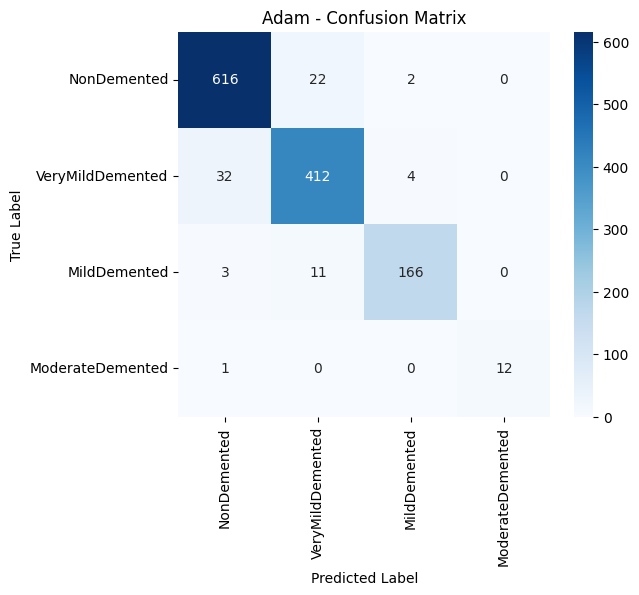

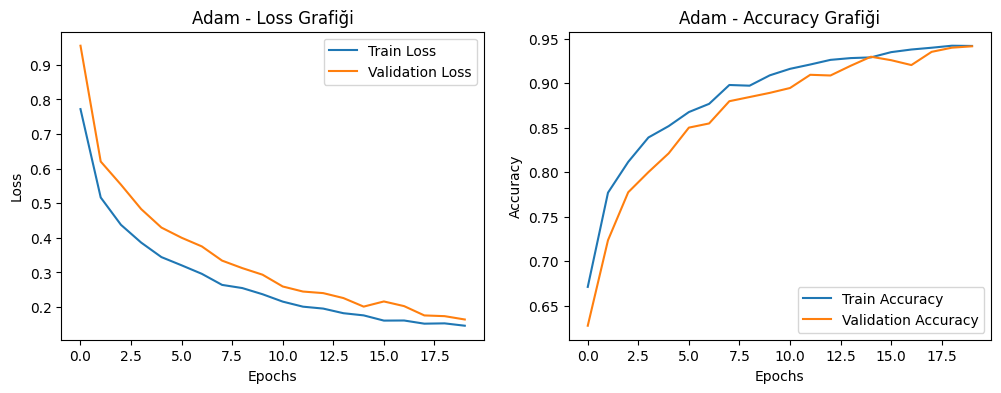


üîÑ SGD Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...

Epoch 1/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 37ms/step - accuracy: 0.5889 - loss: 0.9566 - val_accuracy: 0.6034 - val_loss: 0.9541 - learning_rate: 0.0100
Epoch 2/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 24ms/step - accuracy: 0.7582 - loss: 0.5418 - val_accuracy: 0.7283 - val_loss: 0.6543 - learning_rate: 0.0100
Epoch 3/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.7870 - loss: 0.4883 - val_accuracy: 0.7346 - val_loss: 0.6039 - learning_rate: 0.0100
Epoch 4/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 23ms/step - accuracy: 0.8165 - loss: 0.4294 - val_accuracy: 0.7845 - val_loss: 0.5012 - learning_rate: 0.0100
Epoch 5/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8403 - loss: 0.3779 - val_accuracy: 0.8142 - val_loss: 0.4607 - le

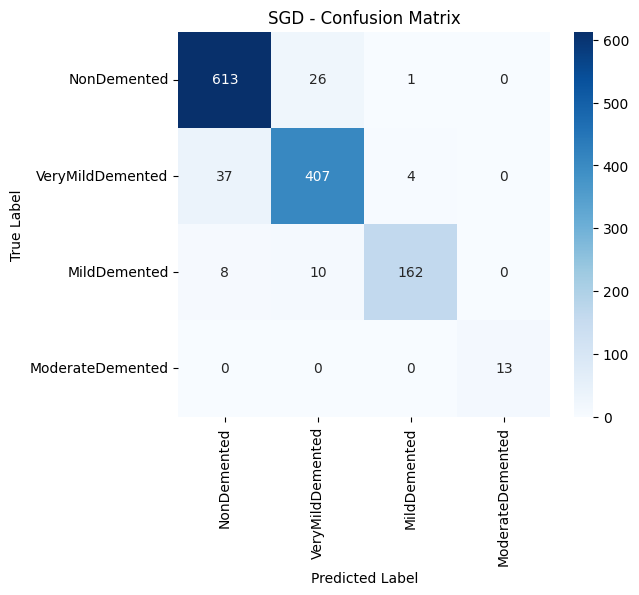

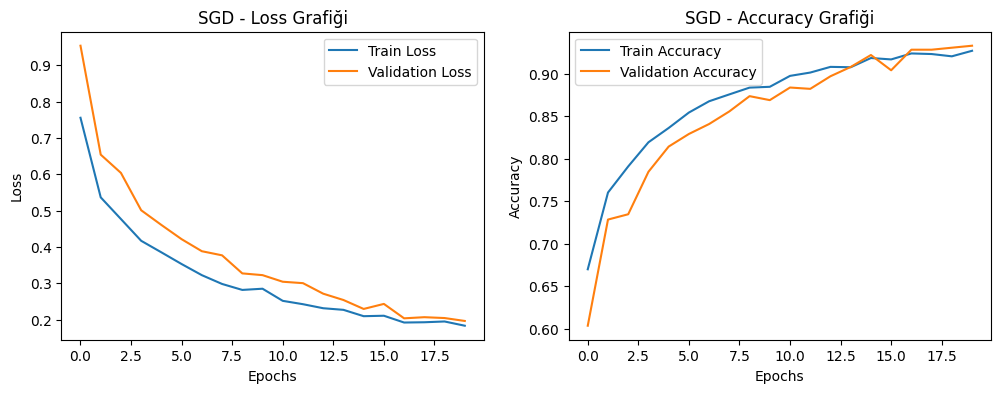


üîÑ Nadam Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...

Epoch 1/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 35ms/step - accuracy: 0.6206 - loss: 0.9117 - val_accuracy: 0.6464 - val_loss: 0.9506 - learning_rate: 0.0020
Epoch 2/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.7797 - loss: 0.5007 - val_accuracy: 0.7510 - val_loss: 0.5817 - learning_rate: 0.0020
Epoch 3/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8206 - loss: 0.4186 - val_accuracy: 0.7783 - val_loss: 0.5145 - learning_rate: 0.0020
Epoch 4/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8392 - loss: 0.3756 - val_accuracy: 0.8298 - val_loss: 0.4291 - learning_rate: 0.0020
Epoch 5/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8586 - loss: 0.3332 - val_accuracy: 0.8275 - val_loss: 0.4009 - 

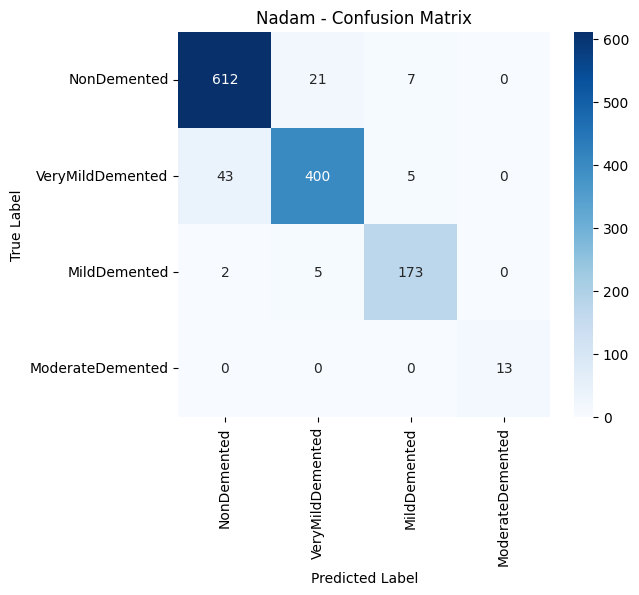

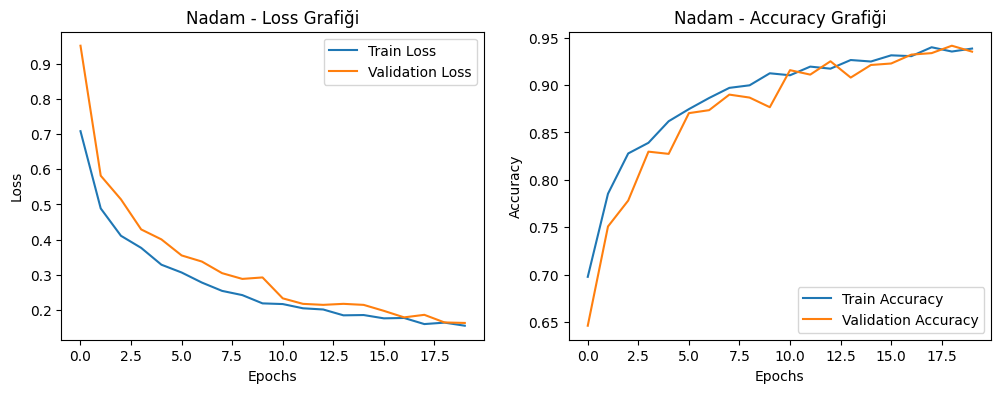


üîÑ RMSprop Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...

Epoch 1/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 34ms/step - accuracy: 0.5985 - loss: 0.9517 - val_accuracy: 0.6269 - val_loss: 0.9102 - learning_rate: 0.0010
Epoch 2/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.7751 - loss: 0.5316 - val_accuracy: 0.7299 - val_loss: 0.6253 - learning_rate: 0.0010
Epoch 3/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8117 - loss: 0.4371 - val_accuracy: 0.7650 - val_loss: 0.5442 - learning_rate: 0.0010
Epoch 4/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8397 - loss: 0.3928 - val_accuracy: 0.8072 - val_loss: 0.4747 - learning_rate: 0.0010
Epoch 5/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8632 - loss: 0.3332 - val_accuracy: 0.8048 - val_loss: 0.4499 

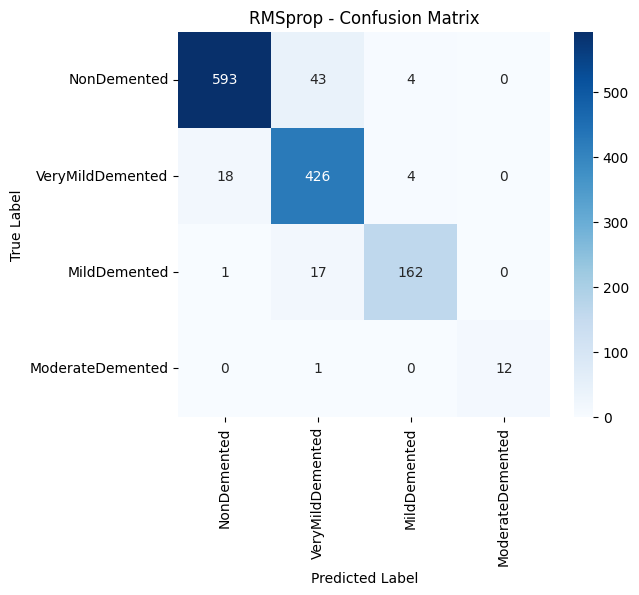

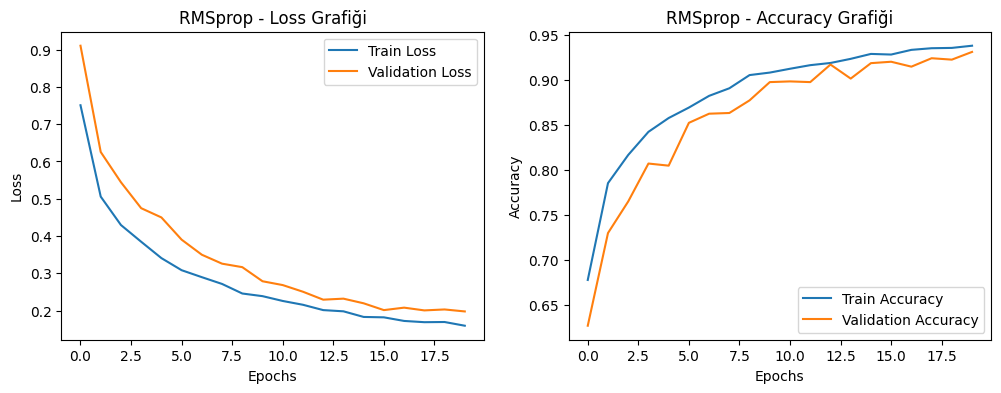


üîÑ Adadelta Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...

Epoch 1/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 35ms/step - accuracy: 0.5900 - loss: 0.9471 - val_accuracy: 0.6245 - val_loss: 0.9592 - learning_rate: 1.0000
Epoch 2/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.7615 - loss: 0.5451 - val_accuracy: 0.7158 - val_loss: 0.6534 - learning_rate: 1.0000
Epoch 3/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 23ms/step - accuracy: 0.8138 - loss: 0.4474 - val_accuracy: 0.7549 - val_loss: 0.5633 - learning_rate: 1.0000
Epoch 4/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8309 - loss: 0.4002 - val_accuracy: 0.7650 - val_loss: 0.5243 - learning_rate: 1.0000
Epoch 5/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.8550 - loss: 0.3544 - val_accuracy: 0.8126 - val_loss: 0.4525

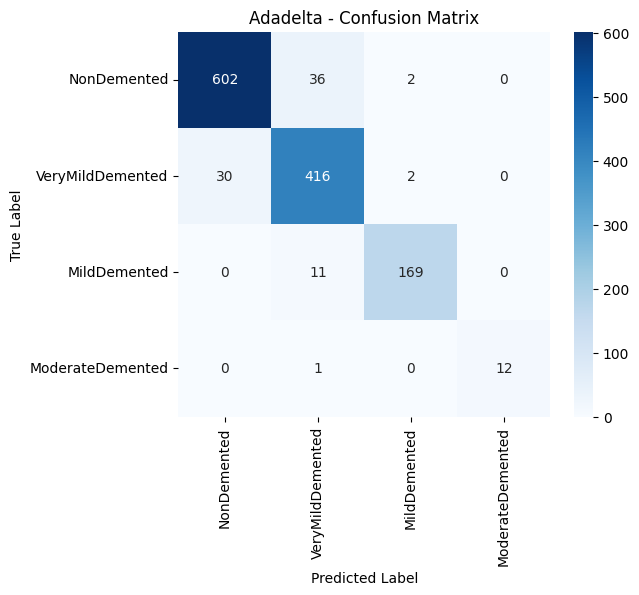

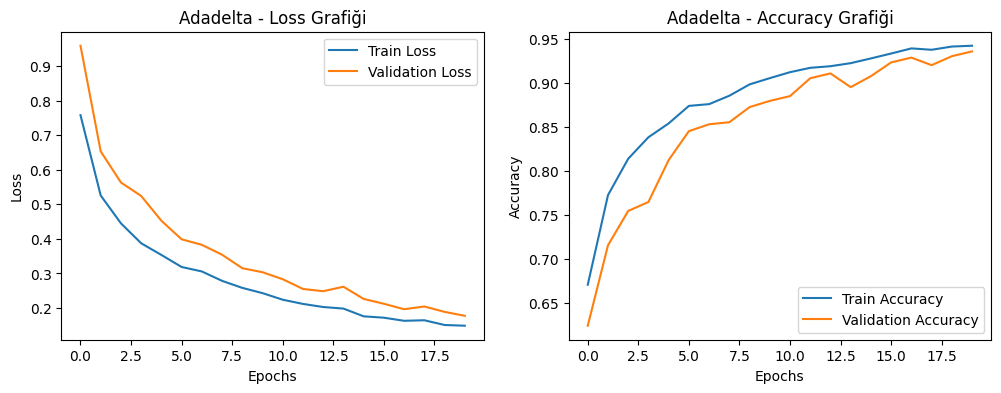


üîÑ Adagrad Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...

Epoch 1/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 34ms/step - accuracy: 0.5221 - loss: 1.0979 - val_accuracy: 0.5816 - val_loss: 1.0252 - learning_rate: 0.0100
Epoch 2/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.7088 - loss: 0.6772 - val_accuracy: 0.6604 - val_loss: 0.7498 - learning_rate: 0.0100
Epoch 3/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 24ms/step - accuracy: 0.7470 - loss: 0.5849 - val_accuracy: 0.6776 - val_loss: 0.6989 - learning_rate: 0.0100
Epoch 4/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 23ms/step - accuracy: 0.7671 - loss: 0.5430 - val_accuracy: 0.6956 - val_loss: 0.6689 - learning_rate: 0.0100
Epoch 5/20
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 23ms/step - accuracy: 0.7879 - loss: 0.5037 - val_accuracy: 0.7119 - val_loss: 0.6456 

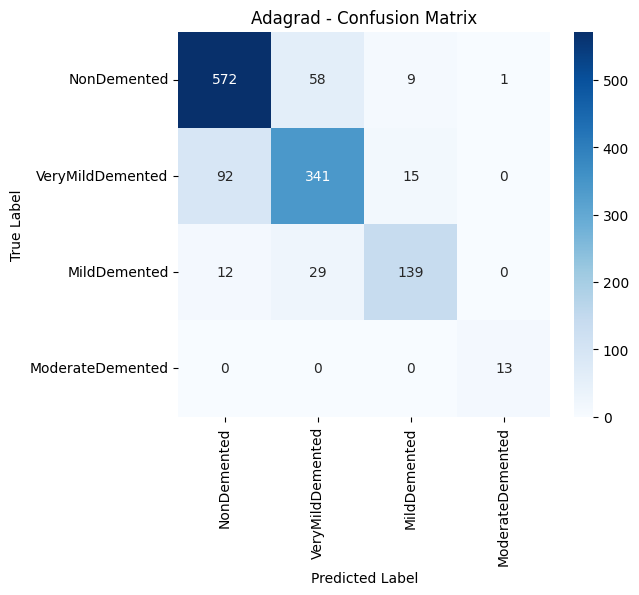

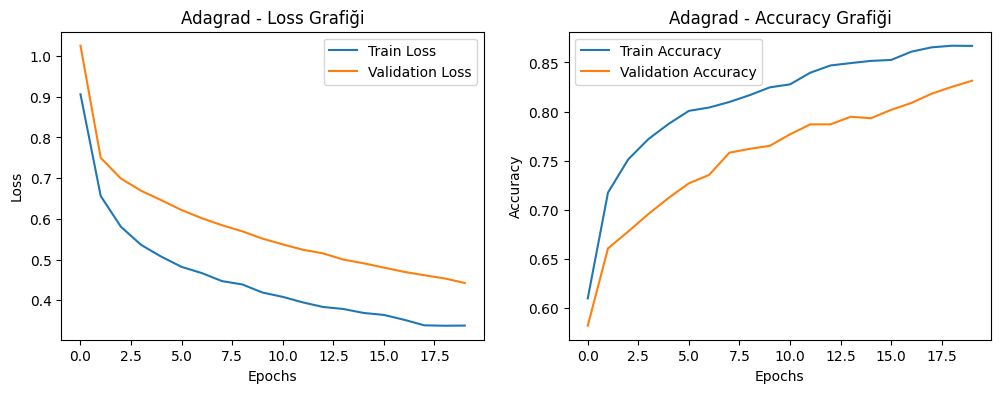

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\nüîÑ {optimizer_name} Optimizer ile Model Eƒüitimi Ba≈ülƒ±yor...\n")
    model = build_model(optimizer, dropout_rate=0.5)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    # Model tahminleri
    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    # Model deƒüerlendirme metrikleri
    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    # Sƒ±nƒ±f etiketlerini doƒürulama
    unique_labels = sorted(set(y_true))
    valid_label_names = [k for k, v in label_map.items() if v in unique_labels]

    # Classification Report
    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True, digits=4)

    # Sonu√ßlarƒ± kaydetme
    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    # Sonu√ßlarƒ± ekrana yazdƒ±rma
    print(f"‚úÖ Test Accuracy: {test_acc:.4f}")
    print(f"‚úÖ F1 Score (Weighted Avg): {f1:.4f}")
    print(f"‚úÖ Recall Score (Weighted Avg): {recall:.4f}")
    print(f"‚úÖ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")


    # Confusion Matrix G√∂rselle≈ütirme
    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

# Loss ve Accuracy Grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{optimizer_name} - Loss Grafiƒüi')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{optimizer_name} - Accuracy Grafiƒüi')
    plt.legend()
    plt.show()

In [ ]:
for optimizer_name, result in results.items():
    print(f"\n{optimizer_name} Optimizer - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score (Weighted Avg): {result['f1_score']:.4f}")
    print(f"Recall Score (Weighted Avg): {result['recall_score']:.4f}")


Adam Optimizer - Final Results
Test Accuracy: 0.9415
F1 Score (Weighted Avg): 0.9414
Recall Score (Weighted Avg): 0.9415

SGD Optimizer - Final Results
Test Accuracy: 0.9329
F1 Score (Weighted Avg): 0.9327
Recall Score (Weighted Avg): 0.9329

Nadam Optimizer - Final Results
Test Accuracy: 0.9352
F1 Score (Weighted Avg): 0.9350
Recall Score (Weighted Avg): 0.9352

RMSprop Optimizer - Final Results
Test Accuracy: 0.9313
F1 Score (Weighted Avg): 0.9318
Recall Score (Weighted Avg): 0.9313

Adadelta Optimizer - Final Results
Test Accuracy: 0.9360
F1 Score (Weighted Avg): 0.9362
Recall Score (Weighted Avg): 0.9360

Adagrad Optimizer - Final Results
Test Accuracy: 0.8314
F1 Score (Weighted Avg): 0.8302
Recall Score (Weighted Avg): 0.8314


## Resnet50

Resnet50 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarƒ±nƒ±n ba≈üarƒ±mlarƒ±

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix


In [ ]:
# Veri yolu ve boyutlar
dataset_path = r"data/Original20SplitDataset"
img_size = 224

# Etiket haritasƒ±
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata olu≈ütu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eƒüitim ve test verisi
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

In [ ]:
# ResNet50 modeli
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model olu≈üturma
def build_model(optimizer, dropout_rate=0.5):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Optimizasyonlar
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}
# Model √∂zetini g√∂ster
base_model.summary()

results = {}

94765736/94765736 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


Model: "resnet50"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_pad           ‚îÇ (None, 230, 230,  ‚îÇ          0 ‚îÇ input_layer[0][0] ‚îÇ
‚îÇ (ZeroPadding2D)     ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_conv (Conv2D) ‚îÇ (None, 112, 112,  ‚îÇ      9,472 ‚îÇ conv1_pad[0][0]   ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_bn            ‚îÇ (None, 112, 112,  ‚îÇ        256 ‚îÇ conv1_conv[0][0]  ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1_relu          ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ conv1_bn[0][0]    ‚îÇ
‚îÇ (Activation)        ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pool1_pad           ‚îÇ (None, 114, 114,  ‚îÇ          0 ‚îÇ conv1_relu[0][0]  ‚îÇ
‚îÇ (ZeroPadding2D)     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ pool1_pool          ‚îÇ (None, 56, 56,    ‚îÇ          0 ‚îÇ pool1_pad[0][0]   ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_block1_1_conv ‚îÇ (None, 56, 56,    ‚îÇ      4,160 ‚îÇ pool1_pool[0][0]  ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2_block1_1_bn   ‚îÇ (None, 56, 56,    ‚îÇ        256 ‚îÇ conv2_block1_1_c‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


üîÅ Adam ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 310s 2s/step - accuracy: 0.4972 - loss: 1.1140 - val_accuracy: 0.4996 - val_loss: 1.0283 - learning_rate: 0.0010
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 293s 2s/step - accuracy: 0.5929 - loss: 0.8756 - val_accuracy: 0.5699 - val_loss: 0.9685 - learning_rate: 0.0010
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295s 2s/step - accuracy: 0.6192 - loss: 0.8304 - val_accuracy: 0.6019 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 293s 2s/step - accuracy: 0.6434 - loss: 0.7835 - val_accuracy: 0.7034 - val_loss: 0.7245 - learning_rate: 0.0010
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290s 2s/step - accuracy: 0.6619 - loss: 0.7489 - val_accuracy: 0.7237 - val_loss: 0.6646 - learning_rate: 0.00

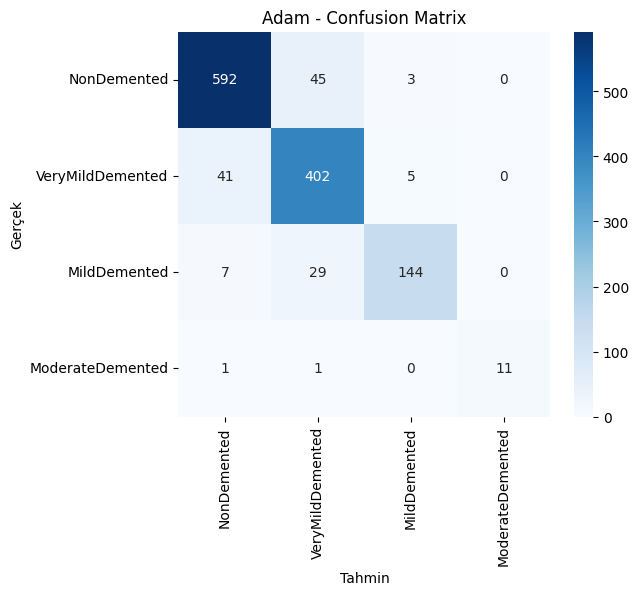

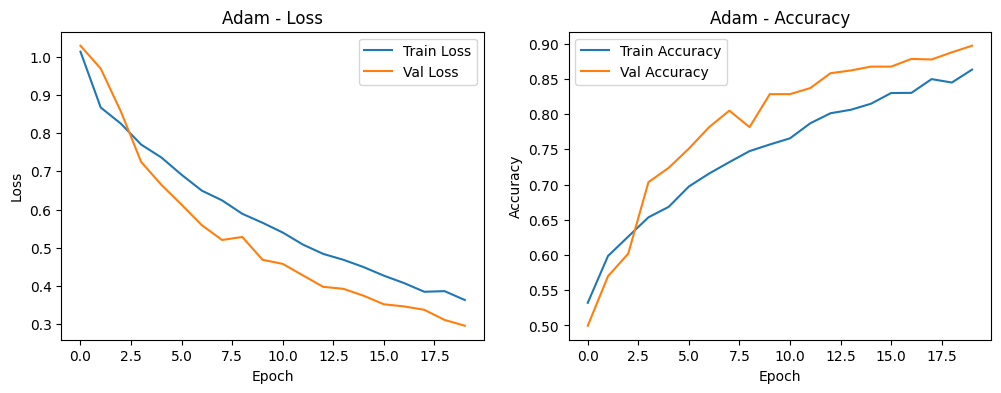


üîÅ SGD ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 301s 2s/step - accuracy: 0.4839 - loss: 1.1279 - val_accuracy: 0.4996 - val_loss: 1.1092 - learning_rate: 0.0100
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 288s 2s/step - accuracy: 0.5770 - loss: 0.8981 - val_accuracy: 0.5027 - val_loss: 0.9418 - learning_rate: 0.0100
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 291s 2s/step - accuracy: 0.6069 - loss: 0.8432 - val_accuracy: 0.6183 - val_loss: 0.8373 - learning_rate: 0.0100
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 287s 2s/step - accuracy: 0.6220 - loss: 0.8218 - val_accuracy: 0.6745 - val_loss: 0.7643 - learning_rate: 0.0100
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290s 2s/step - accuracy: 0.6242 - loss: 0.8057 - val_accuracy: 0.7182 - val_loss: 0.6940 - learning_rate: 0.010

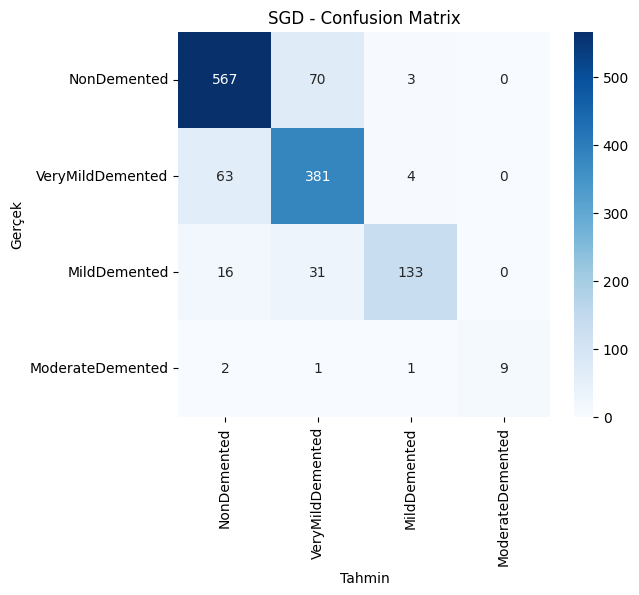

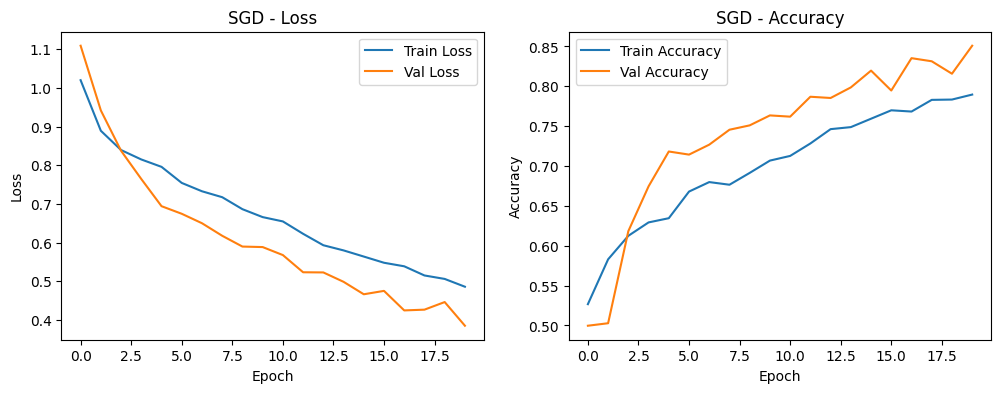


üîÅ Nadam ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302s 2s/step - accuracy: 0.5181 - loss: 1.0668 - val_accuracy: 0.5191 - val_loss: 1.0182 - learning_rate: 0.0020
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286s 2s/step - accuracy: 0.5982 - loss: 0.8753 - val_accuracy: 0.5160 - val_loss: 0.9683 - learning_rate: 0.0020
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 317s 2s/step - accuracy: 0.6247 - loss: 0.8124 - val_accuracy: 0.6347 - val_loss: 0.8422 - learning_rate: 0.0020
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 312s 2s/step - accuracy: 0.6516 - loss: 0.7738 - val_accuracy: 0.7096 - val_loss: 0.7136 - learning_rate: 0.0020
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 339s 2s/step - accuracy: 0.6653 - loss: 0.7319 - val_accuracy: 0.7151 - val_loss: 0.6437 - learning_rate: 0.0

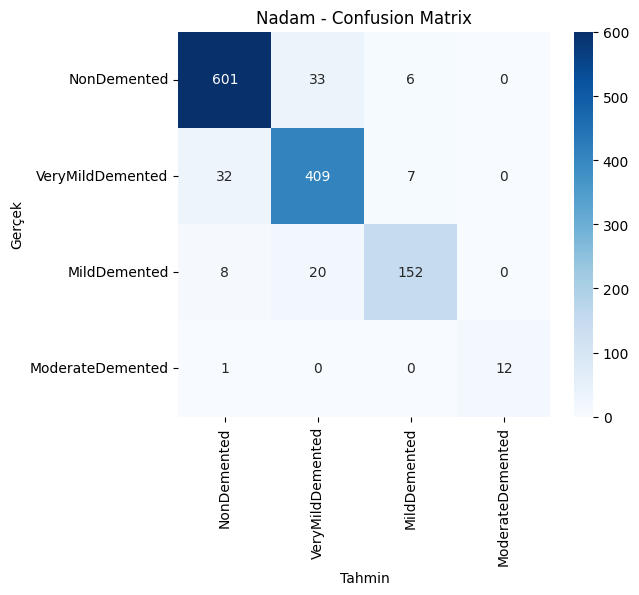

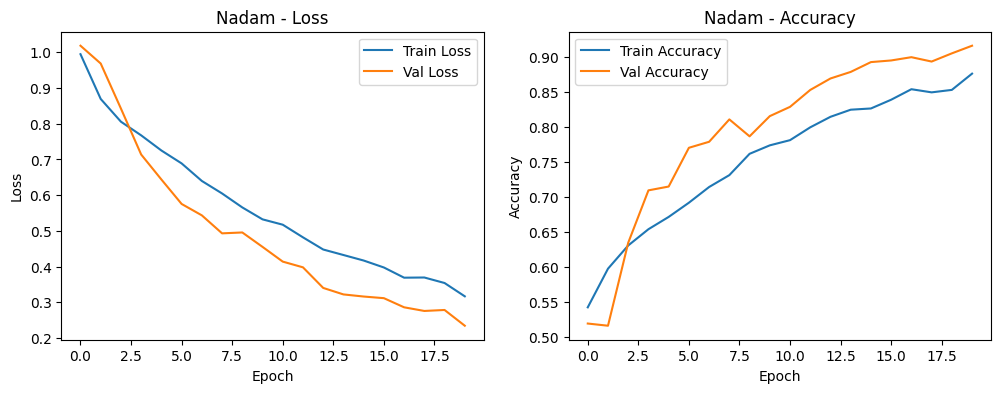


üîÅ RMSprop ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 301s 2s/step - accuracy: 0.5091 - loss: 1.0866 - val_accuracy: 0.5027 - val_loss: 0.9930 - learning_rate: 0.0010
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 312s 2s/step - accuracy: 0.5837 - loss: 0.8880 - val_accuracy: 0.5550 - val_loss: 0.9911 - learning_rate: 0.0010
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 311s 2s/step - accuracy: 0.6189 - loss: 0.8278 - val_accuracy: 0.6495 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 283s 2s/step - accuracy: 0.6403 - loss: 0.7887 - val_accuracy: 0.6916 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314s 2s/step - accuracy: 0.6684 - loss: 0.7435 - val_accuracy: 0.7330 - val_loss: 0.6644 - learning_rate: 0

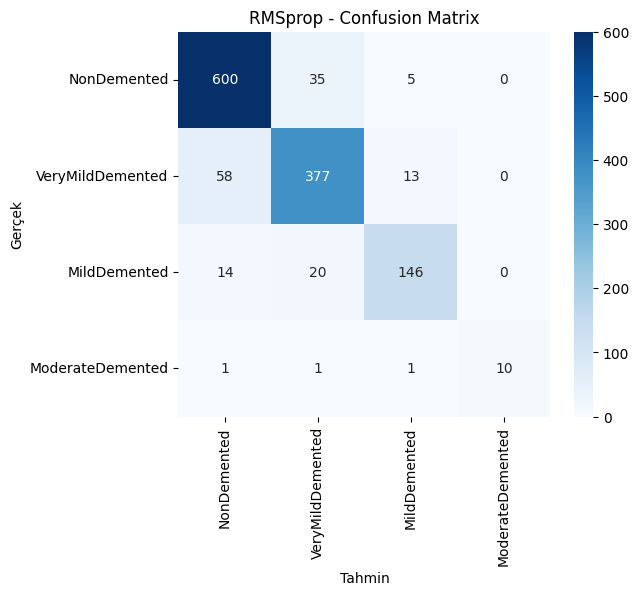

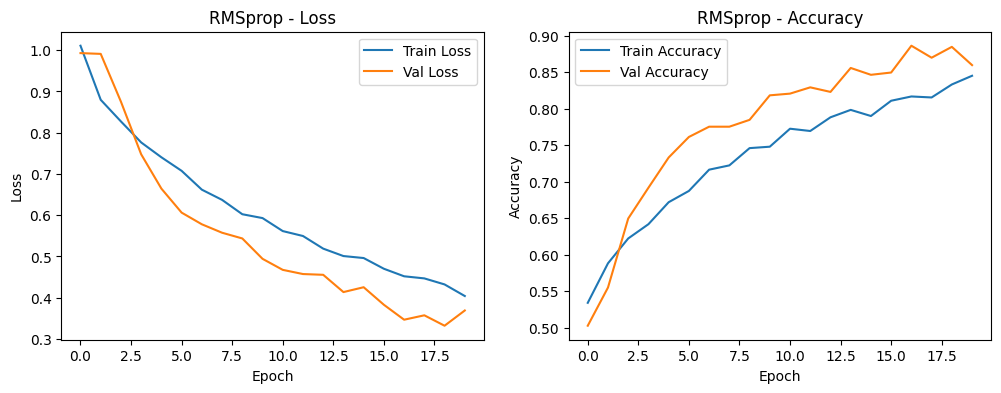


üîÅ Adadelta ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 300s 2s/step - accuracy: 0.5174 - loss: 1.0686 - val_accuracy: 0.4996 - val_loss: 1.0152 - learning_rate: 1.0000
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 283s 2s/step - accuracy: 0.5995 - loss: 0.8650 - val_accuracy: 0.5152 - val_loss: 0.9780 - learning_rate: 1.0000
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 341s 2s/step - accuracy: 0.6304 - loss: 0.8222 - val_accuracy: 0.6534 - val_loss: 0.8370 - learning_rate: 1.0000
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286s 2s/step - accuracy: 0.6536 - loss: 0.7783 - val_accuracy: 0.6932 - val_loss: 0.7341 - learning_rate: 1.0000
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 316s 2s/step - accuracy: 0.6630 - loss: 0.7405 - val_accuracy: 0.7322 - val_loss: 0.6726 - learning_rate: 

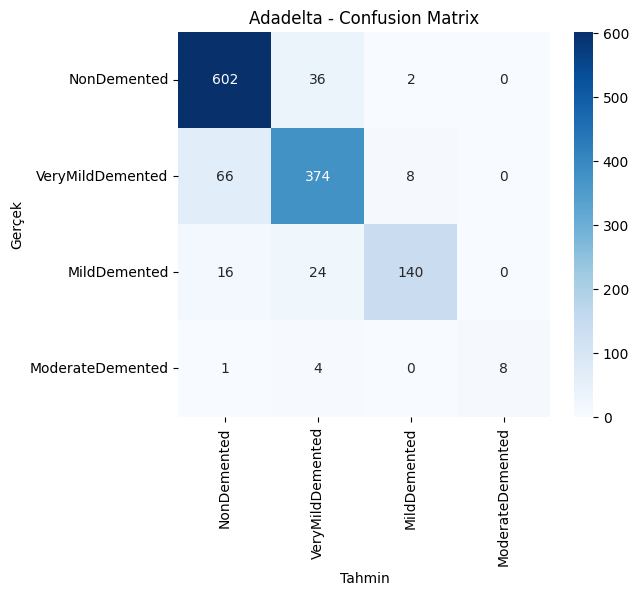

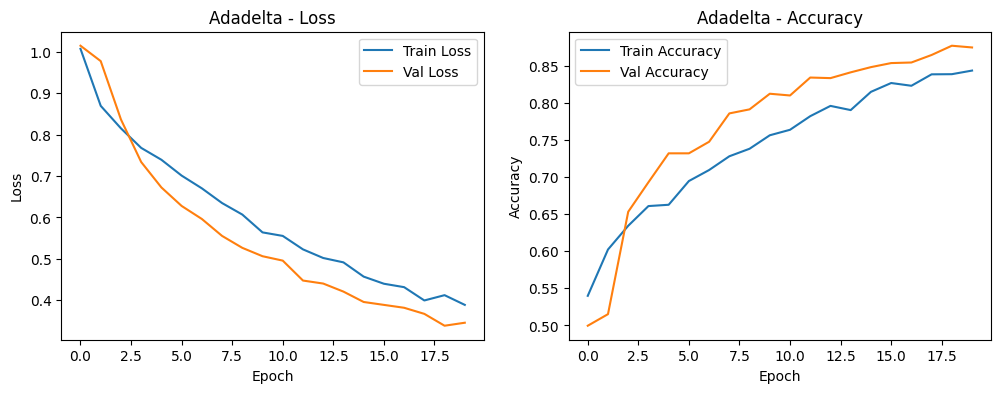


üîÅ Adagrad ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 324s 2s/step - accuracy: 0.4751 - loss: 1.1172 - val_accuracy: 0.4996 - val_loss: 1.0650 - learning_rate: 0.0100
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289s 2s/step - accuracy: 0.5555 - loss: 0.9473 - val_accuracy: 0.5168 - val_loss: 0.9715 - learning_rate: 0.0100
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286s 2s/step - accuracy: 0.5918 - loss: 0.8833 - val_accuracy: 0.6167 - val_loss: 0.8806 - learning_rate: 0.0100
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286s 2s/step - accuracy: 0.6456 - loss: 0.8219 - val_accuracy: 0.6659 - val_loss: 0.8011 - learning_rate: 0.0100
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286s 2s/step - accuracy: 0.6339 - loss: 0.7978 - val_accuracy: 0.6940 - val_loss: 0.7541 - learning_rate: 0

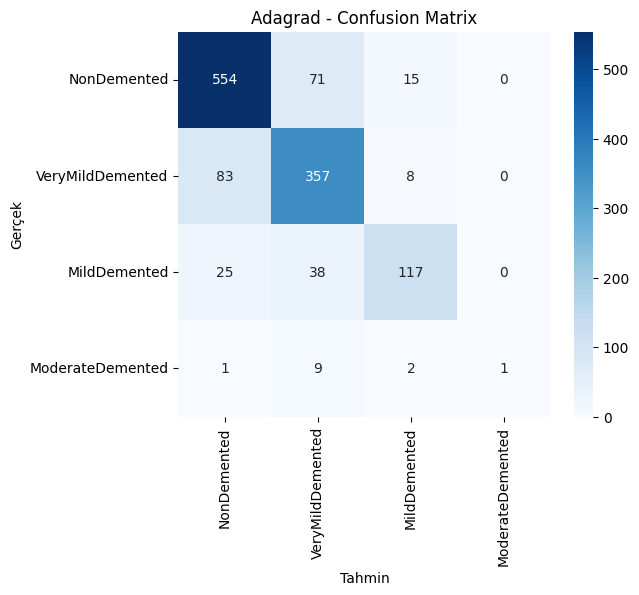

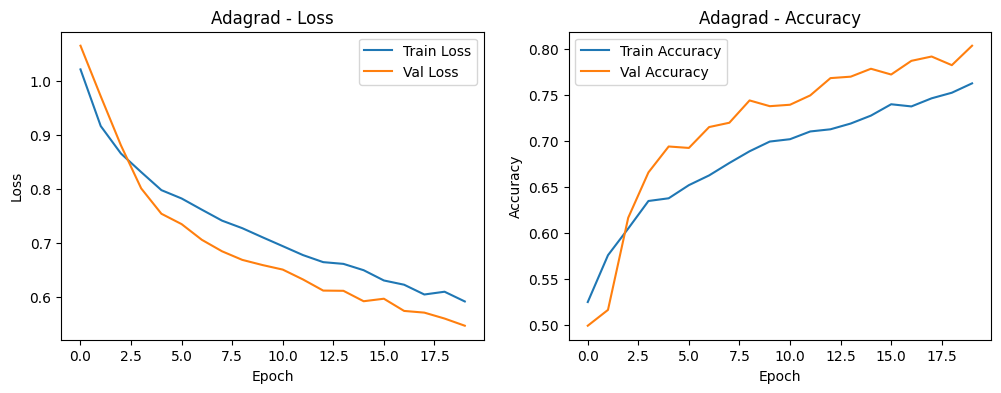

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\nüîÅ {optimizer_name} ile eƒüitim ba≈ülƒ±yor...\n")
    model = build_model(optimizer, dropout_rate=0.5)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    valid_label_names = [k for k, v in label_map.items() if v in sorted(set(y_true))]

    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True)

    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    print(f"‚úÖ Test Accuracy: {test_acc:.4f}")
    print(f"‚úÖ F1 Score: {f1:.4f}")
    print(f"‚úÖ Recall: {recall:.4f}")
    print(f"‚úÖ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")

    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Tahmin')
    plt.ylabel('Ger√ßek')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

    # Loss ve Accuracy grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{optimizer_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{optimizer_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Final Sonu√ßlar
for optimizer_name, result in results.items():
    print(f"\nüìå {optimizer_name} - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Recall Score: {result['recall_score']:.4f}")


üìå Adam - Final Results
Test Accuracy: 0.8970
F1 Score: 0.8970
Recall Score: 0.8970

üìå SGD - Final Results
Test Accuracy: 0.8509
F1 Score: 0.8509
Recall Score: 0.8509

üìå Nadam - Final Results
Test Accuracy: 0.9165
F1 Score: 0.9164
Recall Score: 0.9165

üìå RMSprop - Final Results
Test Accuracy: 0.8845
F1 Score: 0.8837
Recall Score: 0.8845

üìå Adadelta - Final Results
Test Accuracy: 0.8774
F1 Score: 0.8762
Recall Score: 0.8774

üìå Adagrad - Final Results
Test Accuracy: 0.8033
F1 Score: 0.7989
Recall Score: 0.8033


## Inception V3

Inception V3 ile adam, nadam, sgd, rmsprop, adadelta ve adagrad optimizasyonlarƒ±nƒ±n ba≈üarƒ±mlarƒ±

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, Nadam, RMSprop, Adadelta, Adagrad
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix


In [ ]:
# Veri yolu ve boyutlar
dataset_path = r"data/Original20SplitDataset"
img_size = 224

# Etiket haritasƒ±
label_map = {"NonDemented": 0, "VeryMildDemented": 1, "MildDemented": 2, "ModerateDemented": 3}

def load_data(folder_path):
    data, labels = [], []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize((img_size, img_size))
                    data.append(np.array(img))
                    labels.append(label_map[category])
                except Exception as e:
                    print(f"Hata olu≈ütu: {file_path}, {e}")
    return np.array(data) / 255.0, to_categorical(labels, num_classes=4)

# Eƒüitim ve test verisi
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

In [ ]:
# InceptionV3 modeli
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Model fonksiyonu
def build_model(optimizer, dropout_rate=0.5):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Optimizasyonlar
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Nadam': Nadam(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=1.0),
    'Adagrad': Adagrad(learning_rate=0.01)
}
# Model √∂zetini g√∂ster
base_model.summary()

results = {}

87910968/87910968 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


Model: "inception_v3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_7       ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d (Conv2D)     ‚îÇ (None, 111, 111,  ‚îÇ        864 ‚îÇ input_layer_7[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 111, 111,  ‚îÇ         96 ‚îÇ conv2d[0][0]      ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation          ‚îÇ (None, 111, 111,  ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)   ‚îÇ (None, 109, 109,  ‚îÇ      9,216 ‚îÇ activation[0][0]  ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 109, 109,  ‚îÇ         96 ‚îÇ conv2d_1[0][0]    ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation_1        ‚îÇ (None, 109, 109,  ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)   ‚îÇ (None, 109, 109,  ‚îÇ     18,432 ‚îÇ activation_1[0][‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 109, 109,  ‚îÇ        192 ‚îÇ conv2d_2[0][0]    ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)


üîÅ Adam ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207s 1s/step - accuracy: 0.4825 - loss: 1.7056 - val_accuracy: 0.6190 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 192s 1s/step - accuracy: 0.6189 - loss: 0.8930 - val_accuracy: 0.6596 - val_loss: 0.7395 - learning_rate: 0.0010
Epoch 3/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 192s 1s/step - accuracy: 0.7103 - loss: 0.6767 - val_accuracy: 0.6823 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 4/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194s 1s/step - accuracy: 0.7392 - loss: 0.6127 - val_accuracy: 0.7400 - val_loss: 0.6220 - learning_rate: 0.0010
Epoch 5/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 210s 1s/step - accuracy: 0.7589 - loss: 0.5622 - val_accuracy: 0.7338 - val_loss: 0.6163 - learning_rate: 0.00

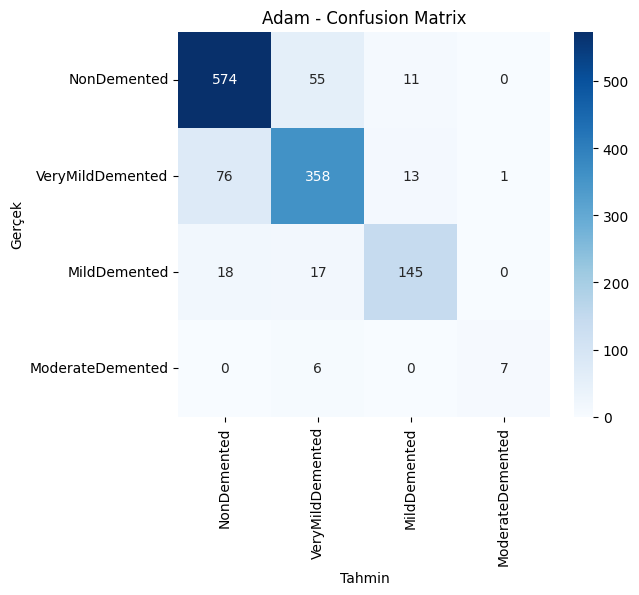

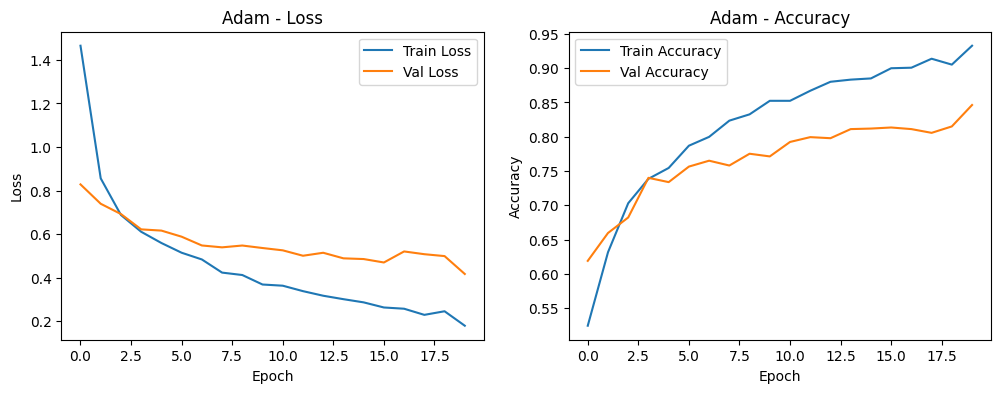


üîÅ SGD ile eƒüitim ba≈ülƒ±yor...

Epoch 1/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 201s 1s/step - accuracy: 0.4657 - loss: 1.4947 - val_accuracy: 0.5222 - val_loss: 0.9621 - learning_rate: 0.0100
Epoch 2/20
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 939ms/step - accuracy: 0.5548 - loss: 1.0479

In [ ]:
for optimizer_name, optimizer in optimizers.items():
    print(f"\nüîÅ {optimizer_name} ile eƒüitim ba≈ülƒ±yor...\n")
    model = build_model(optimizer, dropout_rate=0.5)

    history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    y_pred = model.predict(X_test)
    y_val, y_true = np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1)

    test_acc = accuracy_score(y_true, y_val)
    f1 = f1_score(y_true, y_val, average='weighted')
    recall = recall_score(y_true, y_val, average='weighted')

    valid_label_names = [k for k, v in label_map.items() if v in sorted(set(y_true))]

    report = classification_report(y_true, y_val, labels=[0, 1, 2, 3], target_names=valid_label_names, output_dict=True)

    results[optimizer_name] = {
        'test_accuracy': test_acc,
        'f1_score': f1,
        'recall_score': recall,
        'classification_report': report
    }

    print(f"‚úÖ Test Accuracy: {test_acc:.4f}")
    print(f"‚úÖ F1 Score: {f1:.4f}")
    print(f"‚úÖ Recall: {recall:.4f}")
    print(f"‚úÖ Classification Report:\n{classification_report(y_true, y_val, target_names=label_map.keys(), digits=4)}")

    cm = confusion_matrix(y_true, y_val)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_label_names, yticklabels=valid_label_names)
    plt.xlabel('Tahmin')
    plt.ylabel('Ger√ßek')
    plt.title(f'{optimizer_name} - Confusion Matrix')
    plt.show()

    # Loss ve Accuracy grafikleri
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{optimizer_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{optimizer_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Final Sonu√ßlar
for optimizer_name, result in results.items():
    print(f"\nüìå {optimizer_name} - Final Results")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Recall Score: {result['recall_score']:.4f}")

## Densenet

# Model Deƒüerlendirmeleri

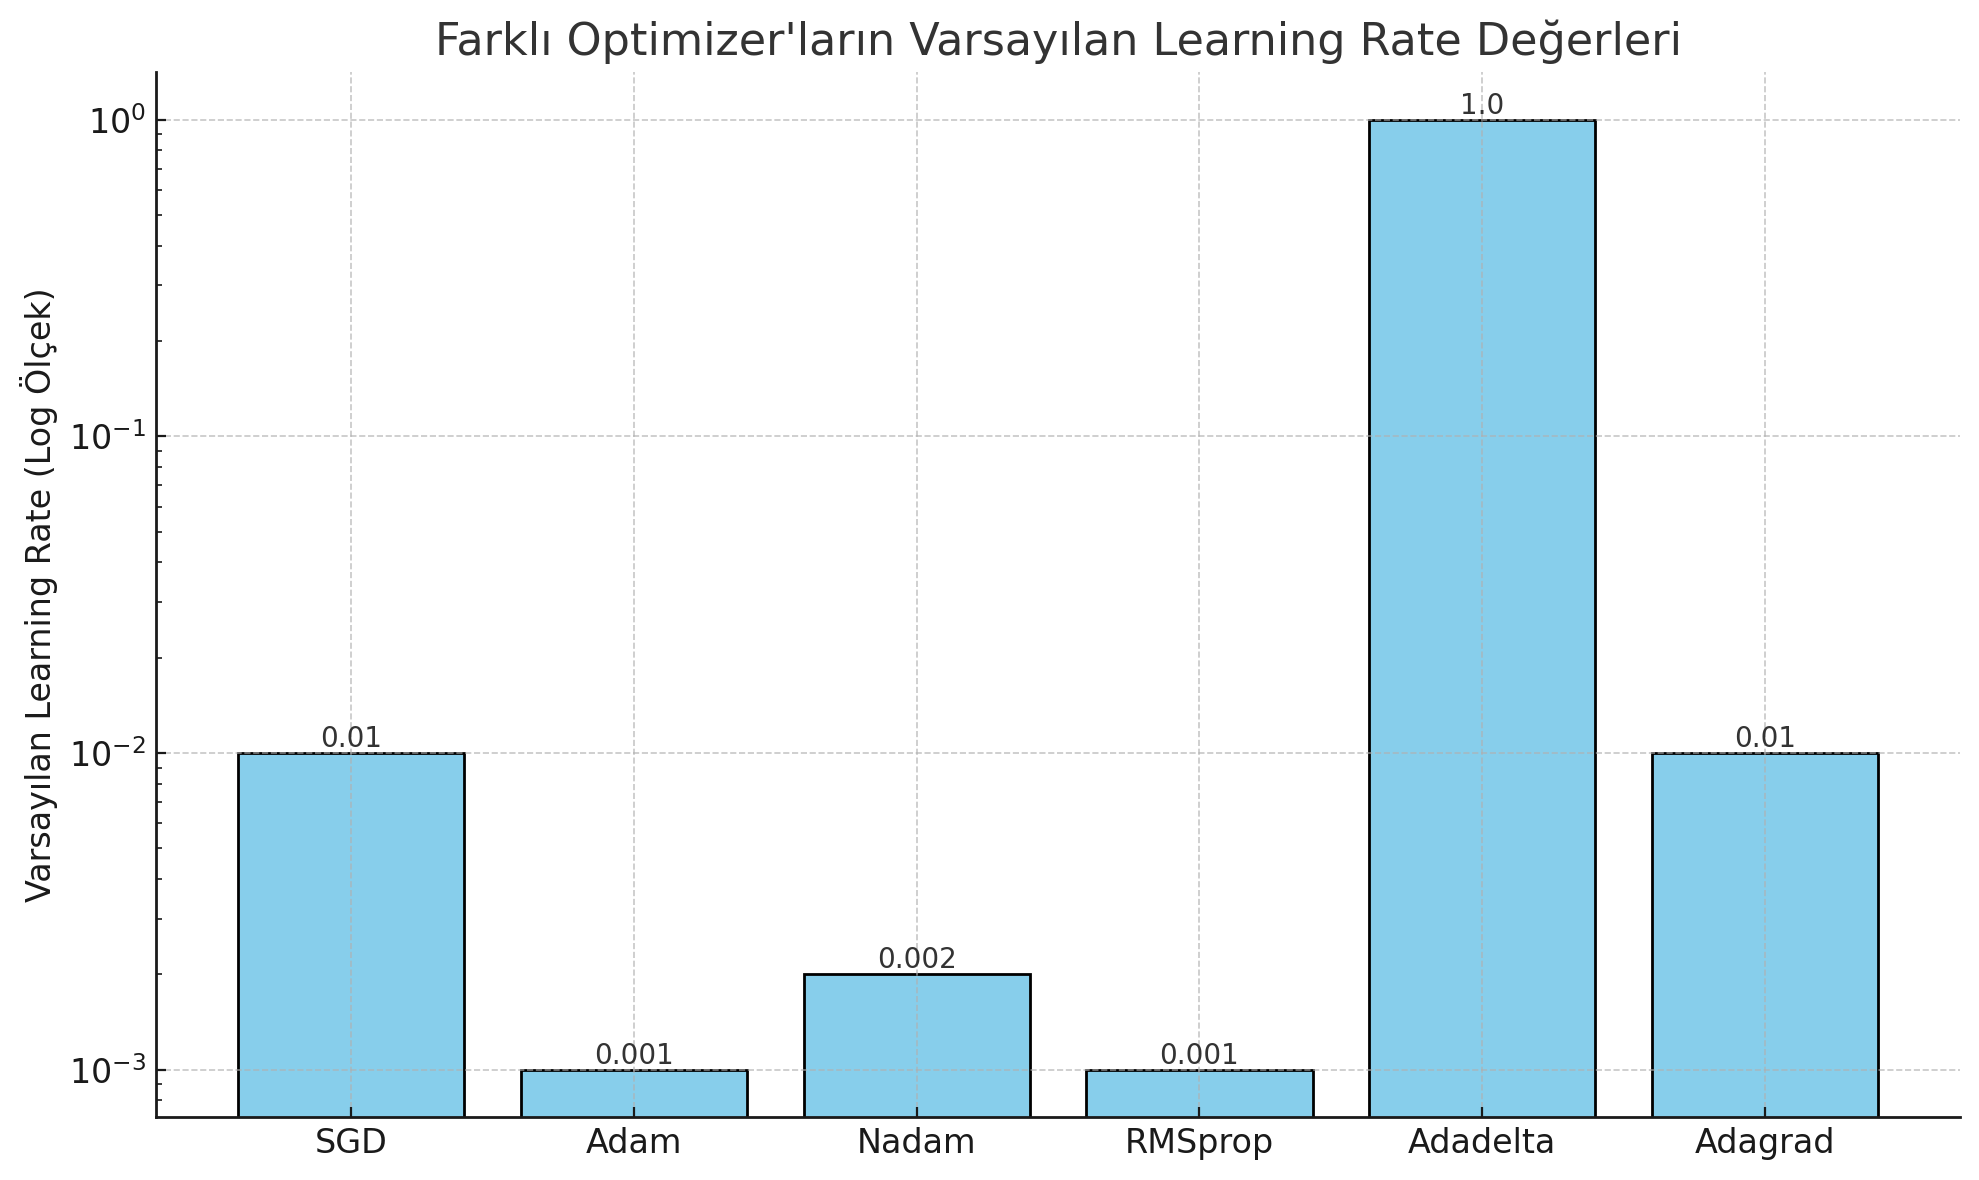

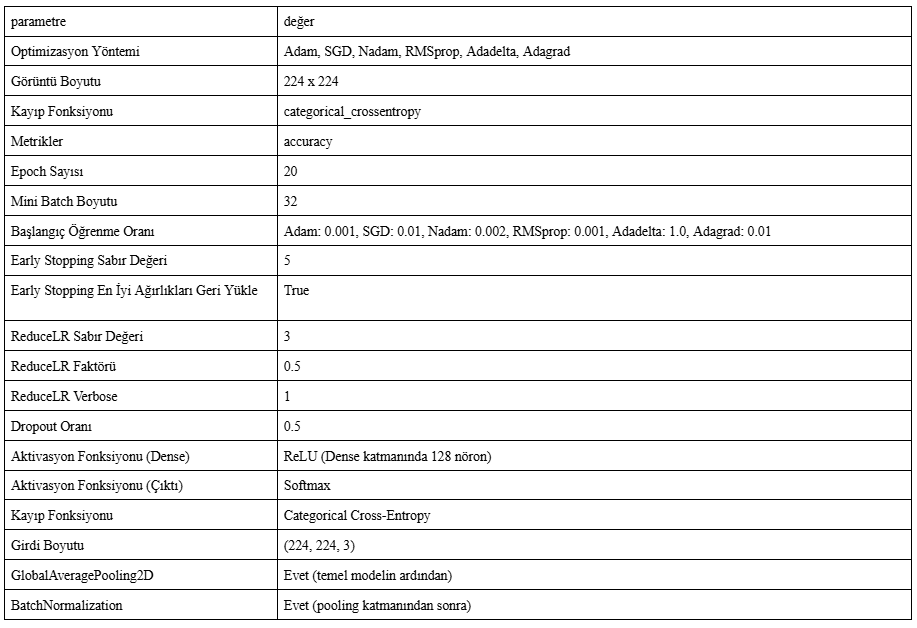

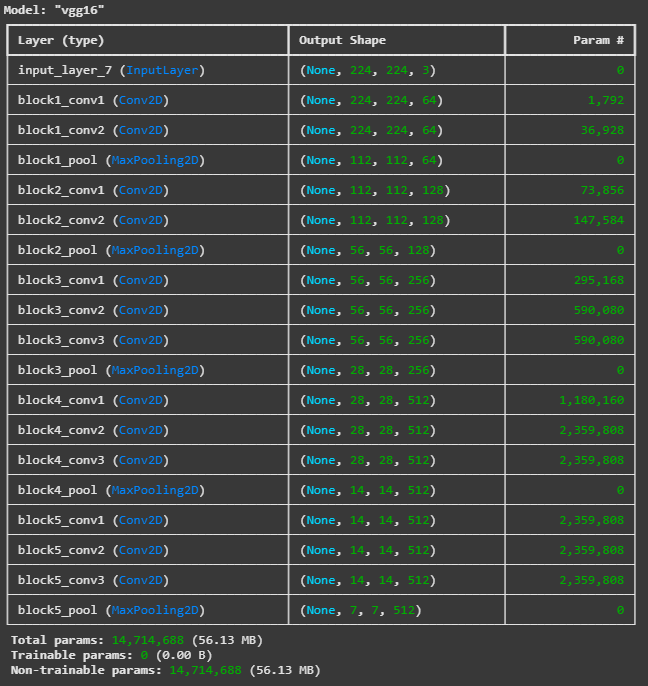

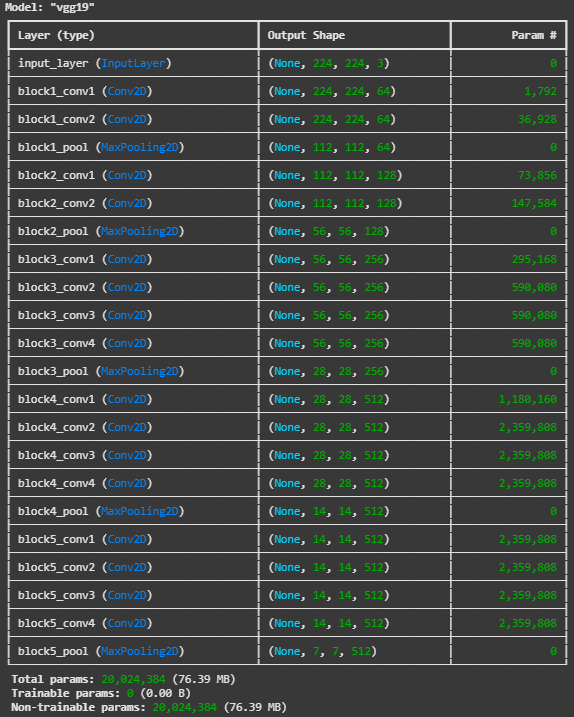

# Projeyi Githuba Y√ºkleme

In [6]:
!git config --global user.email "21060631@stu.omu.edu.tr"
!git config --global user.name "aysenuressiz"

In [7]:
!git clone https://github.com/aysenuressiz/alzheimer-detection.git

Cloning into 'alzheimer-detection'...
fatal: could not read Username for 'https://github.com': No such device or address


In [8]:
!cp "bitirme.ipynb" "alzheimer-detection/"

cp: cannot stat 'bitirme.ipynb': No such file or directory


In [9]:
%cd alzheimer-detection

[Errno 2] No such file or directory: 'alzheimer-detection'
/content


In [4]:
!git add .
!git commit -m "bitirme projesi notebook eklendi"
!git push

[Errno 2] No such file or directory: 'alzheimer-detection'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
